<a href="https://colab.research.google.com/github/BoazNzazi/BoazNzazi-Segmentation_Classification_Clients_Marketing_Cibl-/blob/main/Segmentation_Classification_Clients_MarketingCibl%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Les biblothèques qu'on va utiliser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings

# Filtrer les avertissements
warnings.filterwarnings('ignore')

**Chargement du Dataset**

In [3]:
# Lecture de la base de données
df = pd.read_csv("/content/drive/My Drive/db_marketing.csv", delimiter=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


**Exploration du Dataset**

In [4]:
# Vérifier la structure des données
structure_info = {
    "Nombre de lignes": df.shape[0],
    "Nombre de colonnes": df.shape[1],
    "Types de données": df.dtypes
}

# Afficher les informations de base sur le dataset
structure_info

{'Nombre de lignes': 2240,
 'Nombre de colonnes': 29,
 'Types de données': ID                       int64
 Year_Birth               int64
 Education               object
 Marital_Status          object
 Income                 float64
 Kidhome                  int64
 Teenhome                 int64
 Dt_Customer             object
 Recency                  int64
 MntWines                 int64
 MntFruits                int64
 MntMeatProducts          int64
 MntFishProducts          int64
 MntSweetProducts         int64
 MntGoldProds             int64
 NumDealsPurchases        int64
 NumWebPurchases          int64
 NumCatalogPurchases      int64
 NumStorePurchases        int64
 NumWebVisitsMonth        int64
 AcceptedCmp3             int64
 AcceptedCmp4             int64
 AcceptedCmp5             int64
 AcceptedCmp1             int64
 AcceptedCmp2             int64
 Complain                 int64
 Z_CostContact            int64
 Z_Revenue                int64
 Response                 int6

In [5]:
# Vérification de la taille du dataset avant nettoyage
nombre_lignes = df.shape[0]
nombre_colonnes = df.shape[1]

print("📊 Informations sur la base de données avant nettoyage :")
print(f"✅ Nombre de lignes : {nombre_lignes}")
print(f"✅ Nombre de colonnes : {nombre_colonnes}")

📊 Informations sur la base de données avant nettoyage :
✅ Nombre de lignes : 2240
✅ Nombre de colonnes : 29


In [6]:
# Examen de la structure des données
structure_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Vérification les valeurs manquantes dans chaque colonne**

In [7]:
# Vérifier les valeurs manquantes dans chaque colonne
missing_values = df.isnull().sum()

# Sélectionner uniquement les colonnes ayant des valeurs manquantes
missing_values = missing_values[missing_values > 0]

# Afficher le nombre de valeurs manquantes par colonne
missing_values

missing_values = df['Income'].isnull().sum()
print(f'Le nombre de valeur manquante dans la colonne Income est de {missing_values}')

Le nombre de valeur manquante dans la colonne Income est de 24


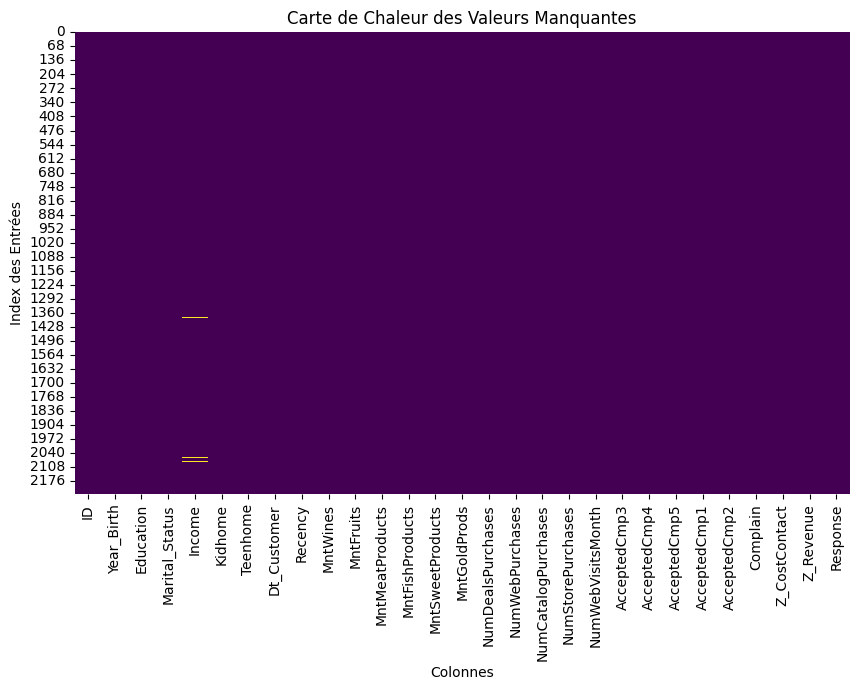

In [8]:
# Vérification visuelle des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Carte de Chaleur des Valeurs Manquantes')
plt.xlabel('Colonnes')
plt.ylabel('Index des Entrées')
plt.show()

**Renommage des Variables**

In [9]:
# Affichage des noms des colonnes actuels
colonnes_actuelles = df.columns.tolist()
colonnes_actuelles

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [10]:
# Renommage des colonnes
nouveaux_noms = {
    'ID': 'Identifiant',
    'Year_Birth': 'Annee_Naissance',
    'Education': 'Niveau_Education',
    'Marital_Status': 'Statut_Marital',
    'Income': 'Revenu',
    'Kidhome': 'Nb_Enfants',
    'Teenhome': 'Nb_Adolescents',
    'Dt_Customer': 'Date_Inscription',
    'Recency': 'Recence_Achat',
    'MntWines': 'Depenses_Vins',
    'MntFruits': 'Depenses_Fruits',
    'MntMeatProducts': 'Depenses_Viandes',
    'MntFishProducts': 'Depenses_Poissons',
    'MntSweetProducts': 'Depenses_Sucreries',
    'MntGoldProds': 'Depenses_Or',
    'NumDealsPurchases': 'Achats_Promos',
    'NumWebPurchases': 'Achats_Web',
    'NumCatalogPurchases': 'Achats_Catalogue',
    'NumStorePurchases': 'Achats_Magasin',
    'NumWebVisitsMonth': 'VisitesWeb_Mois',
    'AcceptedCmp3': 'Campagne3_Acceptee',
    'AcceptedCmp4': 'Campagne4_Acceptee',
    'AcceptedCmp5': 'Campagne5_Acceptee',
    'AcceptedCmp1': 'Campagne1_Acceptee',
    'AcceptedCmp2': 'Campagne2_Acceptee',
    'Complain': 'Plainte',
    'Z_CostContact': 'Cout_Contact', # à vérifier
    'Z_Revenue': 'Revenu_Z', # à vérifier
    'Response': 'Reponse'
}

In [12]:
df.rename(columns=nouveaux_noms, inplace=True)

# Affichage des nouveaux noms de colonnes
df.columns

Index(['Identifiant', 'Annee_Naissance', 'Niveau_Education', 'Statut_Marital',
       'Revenu', 'Nb_Enfants', 'Nb_Adolescents', 'Date_Inscription',
       'Recence_Achat', 'Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes',
       'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or',
       'Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin',
       'VisitesWeb_Mois', 'Campagne3_Acceptee', 'Campagne4_Acceptee',
       'Campagne5_Acceptee', 'Campagne1_Acceptee', 'Campagne2_Acceptee',
       'Plainte', 'Cout_Contact', 'Revenu_Z', 'Reponse'],
      dtype='object')

**Visualisation des Variables - Analyses Univariée et Bivariée**

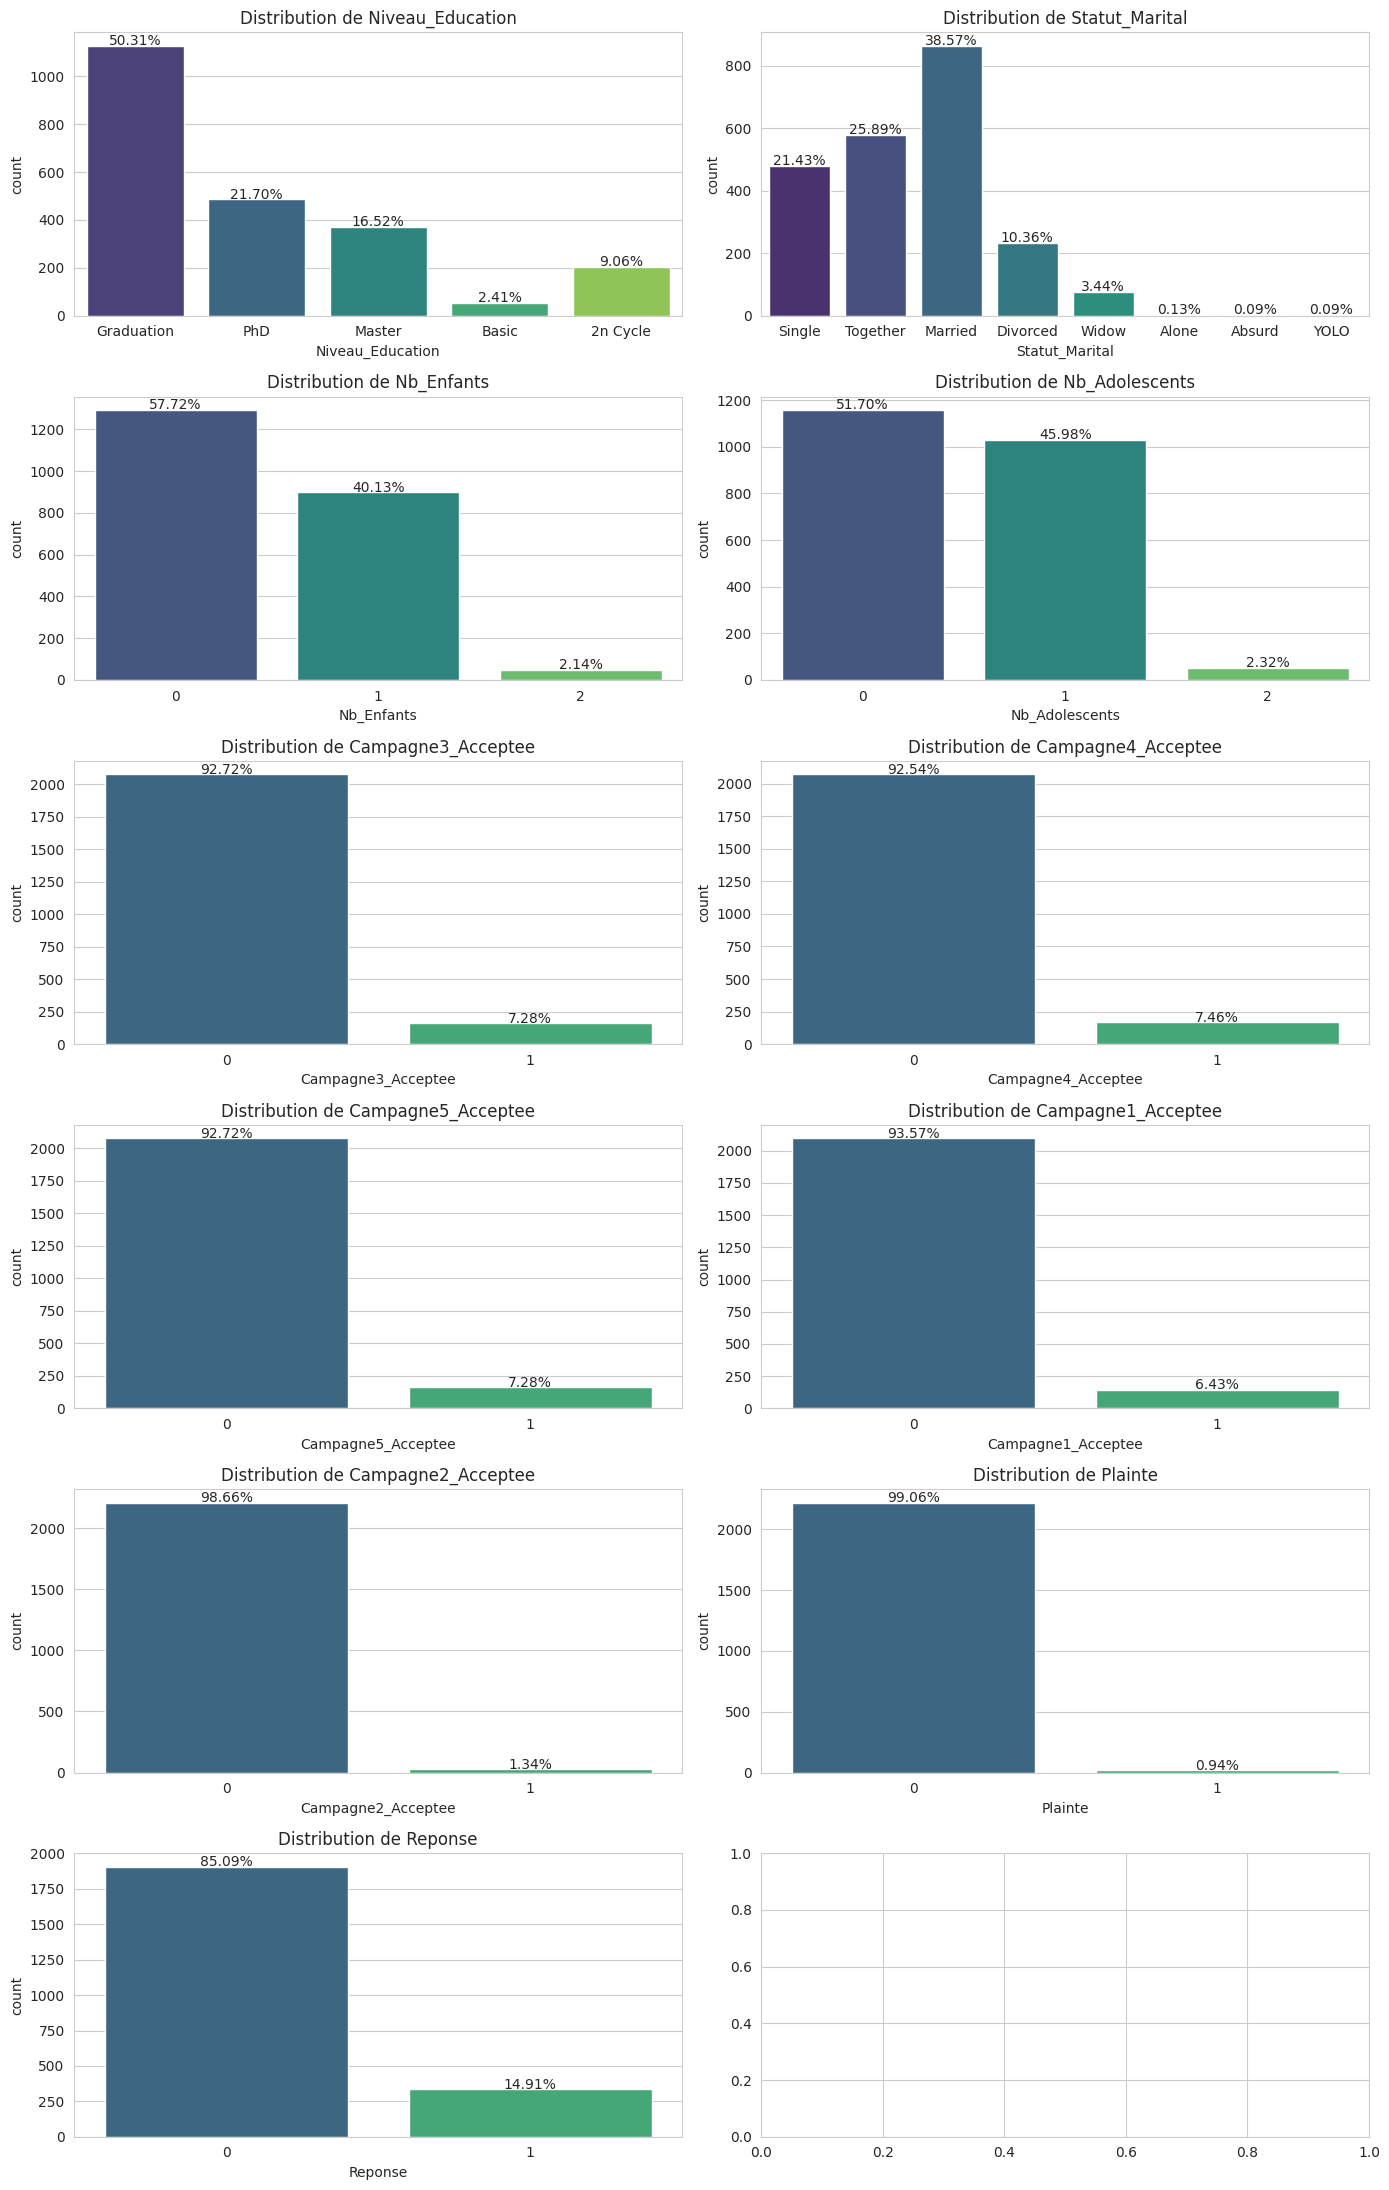

In [13]:
# Mise à jour des listes avec les noms corrects
categorical_columns_filtered = ["Niveau_Education", "Statut_Marital", "Nb_Enfants", "Nb_Adolescents",
                                "Campagne3_Acceptee", "Campagne4_Acceptee", "Campagne5_Acceptee",
                                "Campagne1_Acceptee", "Campagne2_Acceptee", "Plainte", "Reponse"]

# 🔹 Visualisation des variables catégorielles filtrées
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(len(categorical_columns_filtered) // 2 + len(categorical_columns_filtered) % 2, 2, figsize=(14, len(categorical_columns_filtered) * 2))

    for i, col in enumerate(categorical_columns_filtered):
        ax = axes[i//2, i%2]
        total = float(len(df[col]))
        sns.countplot(x=col, data=df, palette="viridis", ax=ax)
        ax.set_title(f'Distribution de {col}')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100 * height/total),
                    ha="center")

    plt.tight_layout()
    plt.show()

**Profil de la Clientèle**

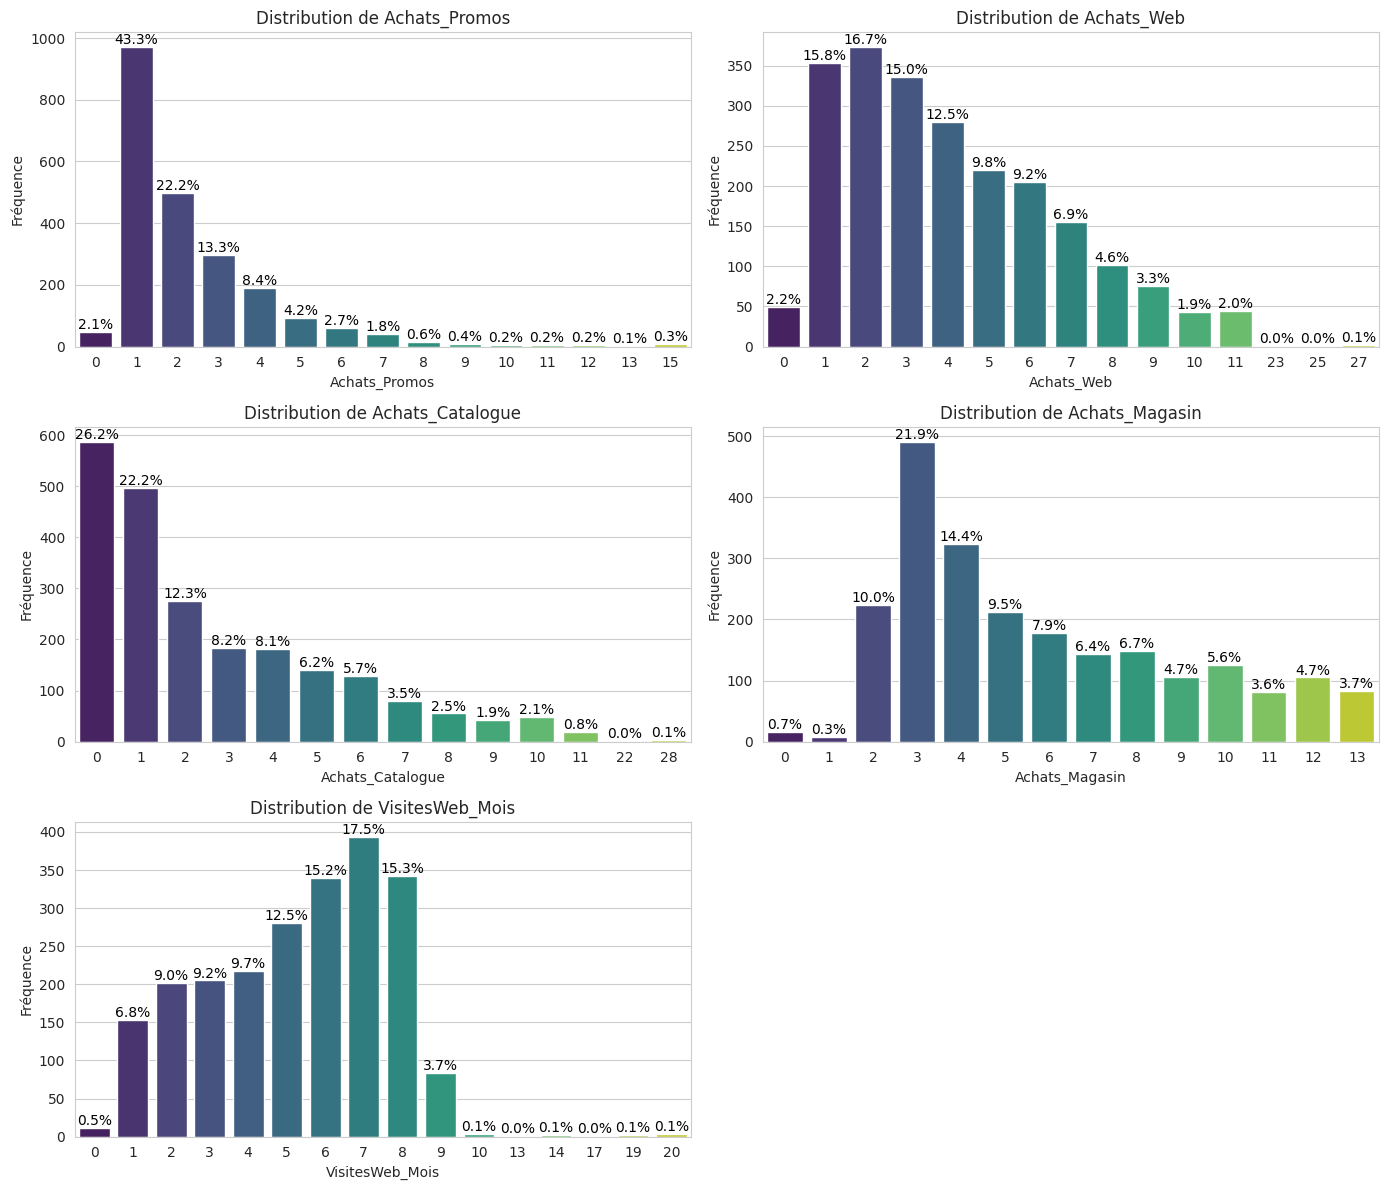

In [14]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Les noms de variables en français
    variables = ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']

    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Parcours des variables pour créer des histogrammes
    for ax, var in zip(axes, variables):
        total = df[var].notnull().sum()  # Total pour le calcul des pourcentages
        countplot = sns.countplot(x=var, data=df, ax=ax, palette='viridis')
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    # Suppression du dernier axe (non utilisé)
    fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

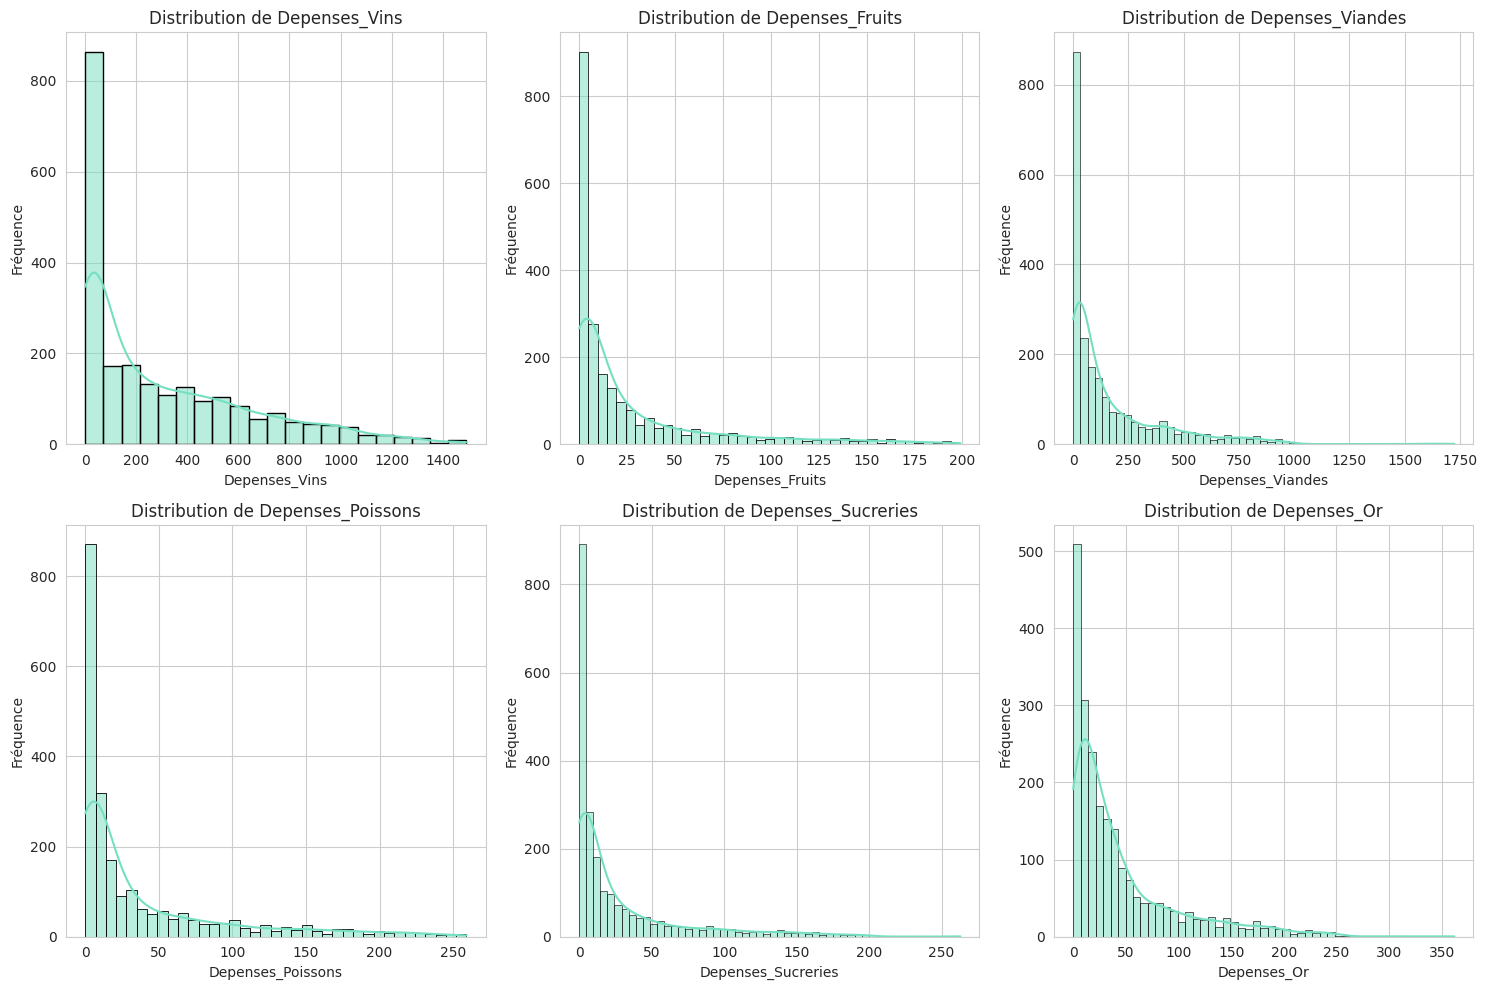

,count,mean,std,min,25%,50%,75%,max
Depenses_Vins,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
Depenses_Fruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
Depenses_Viandes,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
Depenses_Poissons,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0
Depenses_Sucreries,2240.0,27.06,41.28,0.0,1.00,8.0,33.00,263.0
Depenses_Or,2240.0,44.02,52.17,0.0,9.00,24.0,56.00,362.0


In [15]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Définition des variables à visualiser
    depenses_variables = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes',
                          'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']

    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Aplatir le tableau des axes pour un accès facile
    axes = axes.flatten()

    # Parcours des variables pour créer des histogrammes et afficher la statistique descriptive
    for i, var in enumerate(depenses_variables):
        ax = axes[i]
        sns.histplot(df[var], kde=True, ax=ax, color='#75DFC1', edgecolor='black')
        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

stats_desc_table = df[depenses_variables].describe()
stats_desc_table = stats_desc_table.round(2)
from IPython.display import display
display(stats_desc_table.T)


**Interprétation des Statistiques des Revenus des Clients**

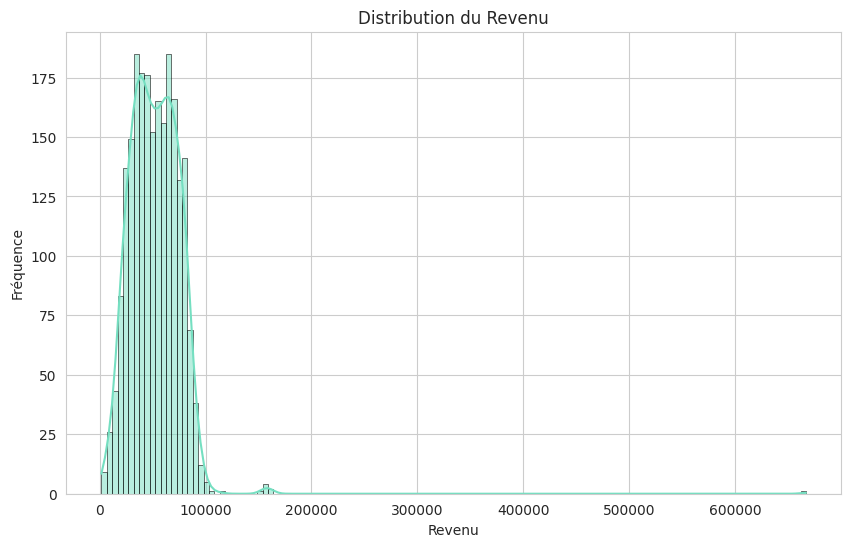

,count,mean,std,min,25%,50%,75%,max
Revenu,2216.0,52247.25,25173.08,1730.0,35303.0,51381.5,68522.0,666666.0


In [16]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'un histogramme pour la variable 'Revenu'
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Revenu'], kde=True, color='#75DFC1', edgecolor='black')
    plt.title('Distribution du Revenu')
    plt.xlabel('Revenu')
    plt.ylabel('Fréquence')
    plt.show()

# Calcul des statistiques descriptives pour 'Revenu'
stats_desc_revenu = df["Revenu"].describe().round(2)

# Convertir en DataFrame pour pouvoir transposer
stats_desc_revenu_df = pd.DataFrame(stats_desc_revenu)

# Transposition du tableau pour une meilleure présentation
stats_desc_revenu_transposed = stats_desc_revenu_df.T

# Affichage du tableau transposé
display(stats_desc_revenu_transposed)

**Imputation de la Variable Revenu**

In [17]:
# Calcul de la médiane pour la colonne 'Revenu'
revenu_median = df['Revenu'].median()

# Imputation des valeurs manquantes par la médiane
df['Revenu'].fillna(revenu_median, inplace=True)


# Calcul des statistiques descriptives pour 'Revenu'
stats_desc_revenu = df["Revenu"].describe().round(2)

# Convertir en DataFrame pour pouvoir transposer
stats_desc_revenu_df = pd.DataFrame(stats_desc_revenu)

# Transposition du tableau pour une meilleure présentation
stats_desc_revenu_transposed = stats_desc_revenu_df.T

# Affichage du tableau transposé
display(stats_desc_revenu_transposed)

,count,mean,std,min,25%,50%,75%,max
Revenu,2240.0,52237.98,25037.96,1730.0,35538.75,51381.5,68289.75,666666.0


**Discrétisation de la Variable Revenu**

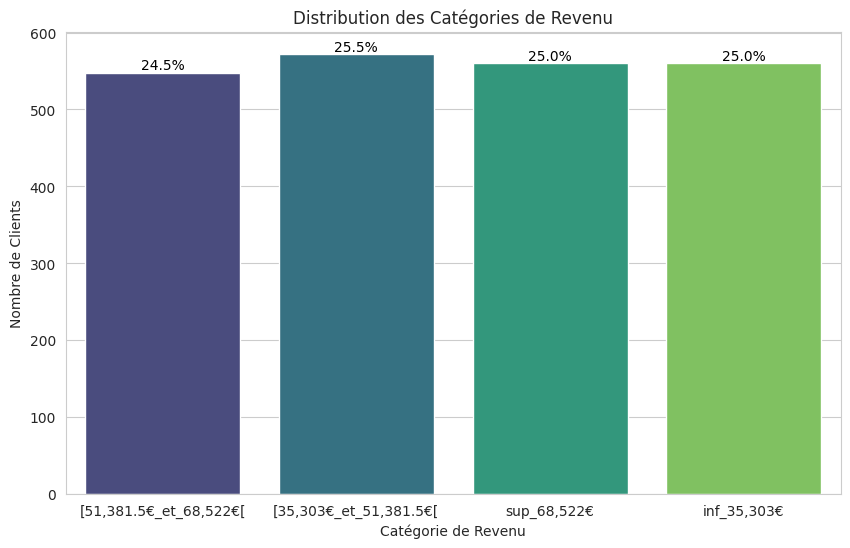

In [18]:
# Détermination des quartiles
quartile1 = df['Revenu'].quantile(0.25)
quartile2 = df['Revenu'].quantile(0.5)  # Médiane
quartile3 = df['Revenu'].quantile(0.75)

# Fonction pour catégoriser chaque revenu en classes nominales
def categorize_revenue(revenue):
    if revenue <= quartile1:
        return 'inf_35,303€'  # Revenus inférieurs au premier quartile
    elif quartile1 < revenue <= quartile2:
        return '[35,303€_et_51,381.5€['  # Revenus entre le premier quartile et la médiane
    elif quartile2 < revenue <= quartile3:
        return '[51,381.5€_et_68,522€['  # Revenus entre la médiane et le troisième quartile
    else:
        return 'sup_68,522€'  # Revenus supérieurs au troisième quartile

# Application de la fonction de catégorisation au DataFrame
df['Categorie_Revenu'] = df['Revenu'].apply(categorize_revenue)

#Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Categorie_Revenu', data=df, palette='viridis')
    ax.set_title('Distribution des Catégories de Revenu')
    ax.set_xlabel('Catégorie de Revenu')
    ax.set_ylabel('Nombre de Clients')

    # Calcul et affichage des pourcentages sur les barres
    total = len(df['Categorie_Revenu'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.show()

**Discrétisation des Dépenses des Clients**

In [19]:
# Liste des colonnes de dépenses
depense_cols = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']

# Création d'un DataFrame pour stocker les statistiques descriptives transposées
stats_desc_all = pd.DataFrame()

# Calcul et affichage des statistiques descriptives pour chaque colonne de dépense
for col in depense_cols:
    stats_desc = df[col].describe().round(2)
    stats_desc_df = pd.DataFrame(stats_desc)
    stats_desc_transposed = stats_desc_df.T
    stats_desc_all = pd.concat([stats_desc_all, stats_desc_transposed])

# Affichage du tableau regroupant toutes les statistiques descriptives transposées
display(stats_desc_all)

,count,mean,std,min,25%,50%,75%,max
Depenses_Vins,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
Depenses_Fruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
Depenses_Viandes,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
Depenses_Poissons,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0
Depenses_Sucreries,2240.0,27.06,41.28,0.0,1.00,8.0,33.00,263.0
Depenses_Or,2240.0,44.02,52.17,0.0,9.00,24.0,56.00,362.0


**Discrétisation des Dépenses des Clients**

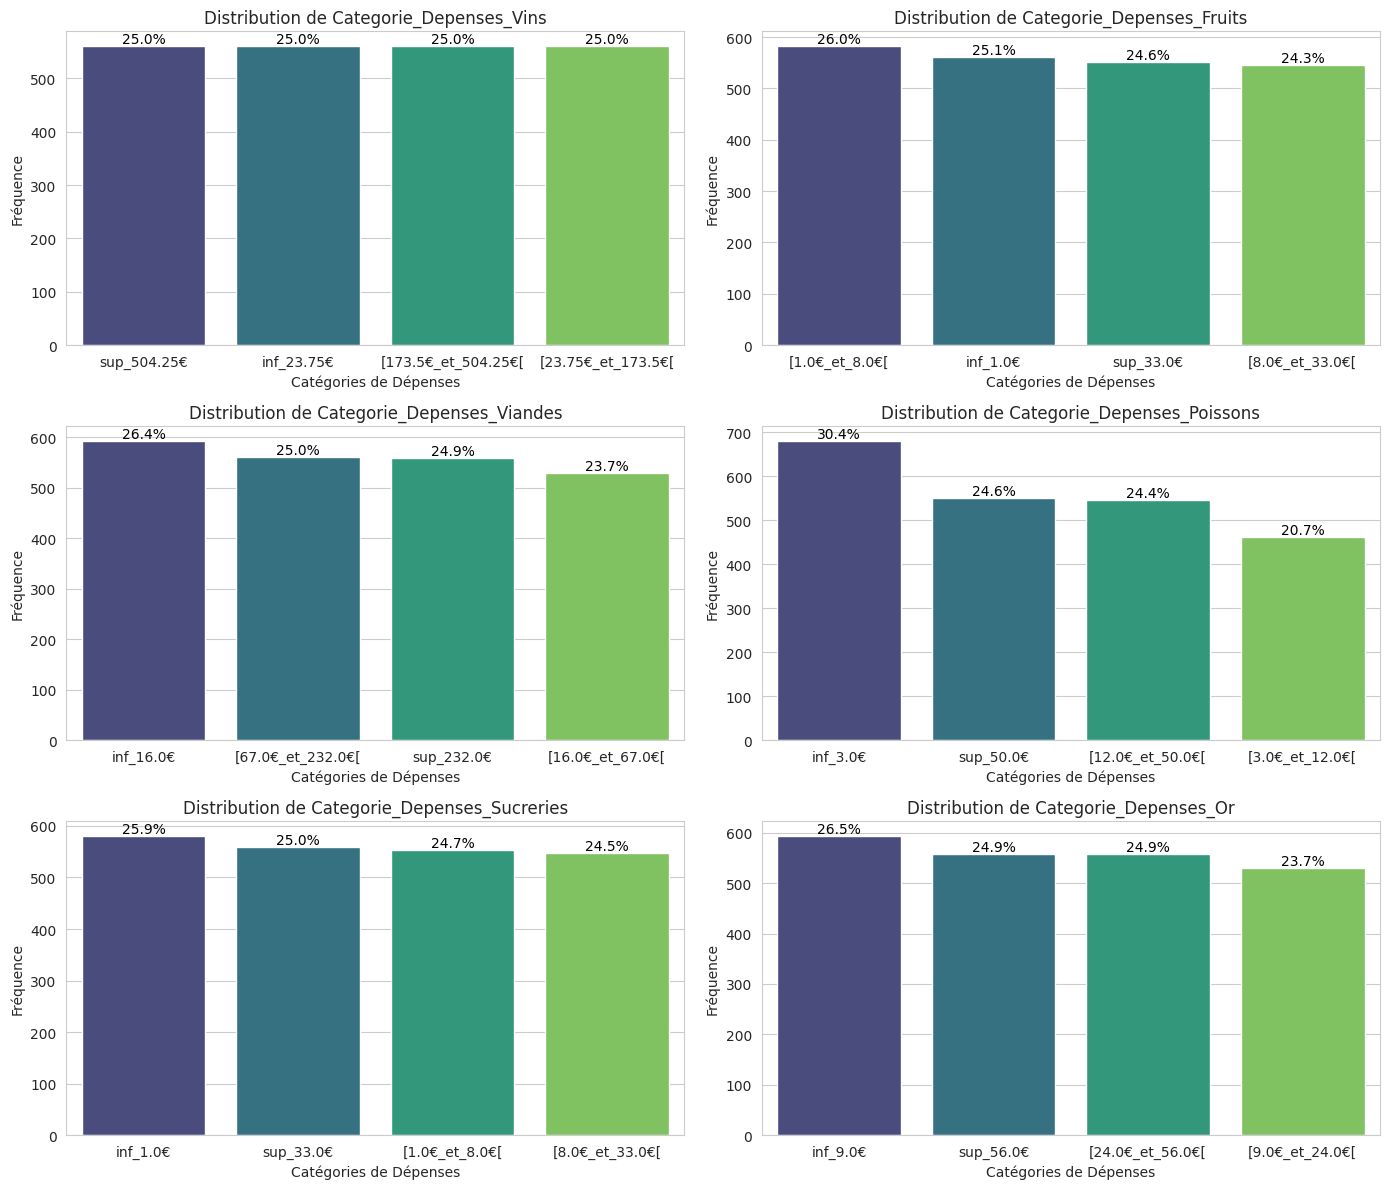

In [20]:
def categorize_expenses(value, quartiles):
    if value <= quartiles[0.25]:
        return f"inf_{quartiles[0.25]}€"
    elif value <= quartiles[0.50]:
        return f"[{quartiles[0.25]}€_et_{quartiles[0.50]}€["
    elif value <= quartiles[0.75]:
        return f"[{quartiles[0.50]}€_et_{quartiles[0.75]}€["
    else:
        return f"sup_{quartiles[0.75]}€"

# Application de la discrétisation pour chaque variable de dépense
depense_cols = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']
for col in depense_cols:
    quartiles = df[col].quantile([0.25, 0.50, 0.75])
    df[f'Categorie_{col}'] = df[col].apply(lambda x: categorize_expenses(x, quartiles))

#----------------------------------------------------------------------------------

# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Liste des colonnes de dépenses discrétisées à visualiser
    depense_cols = ['Categorie_Depenses_Vins', 'Categorie_Depenses_Fruits', 'Categorie_Depenses_Viandes',
                    'Categorie_Depenses_Poissons', 'Categorie_Depenses_Sucreries', 'Categorie_Depenses_Or']

    # Parcours des colonnes pour créer des histogrammes
    for ax, col in zip(axes, depense_cols):
        total = len(df[col])  # Total pour le calcul des pourcentages
        order = df[col].value_counts().index  # Ordre basé sur la fréquence
        countplot = sns.countplot(x=col, data=df, ax=ax, palette='viridis', order=order)
        ax.set_title(f'Distribution de {col}')
        ax.set_xlabel('Catégories de Dépenses')
        ax.set_ylabel('Fréquence')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

**Calcul de l'Âge et de l'Ancienneté des Clients**

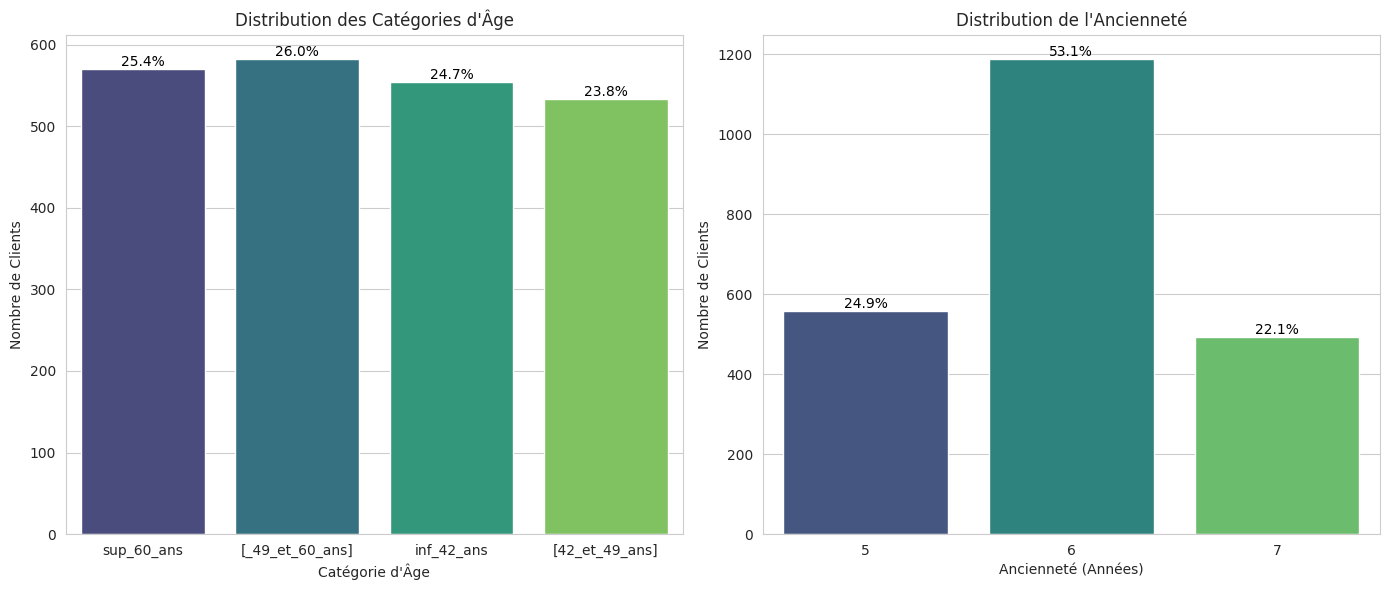

In [21]:
# Calcul de l'âge en 2019 (parce que les  données ont été mis sur le site depuis 2019 )
df['Age'] = 2019 - df['Annee_Naissance']

# Conversion de 'Date_Inscription' en type datetime
df['Date_Inscription'] = pd.to_datetime(df['Date_Inscription'])

# Calcul de l'ancienneté en 2019
df['Anciennete'] = 2019 - df['Date_Inscription'].dt.year

#---------------------------------------------------------------

# Fonction pour catégoriser l'âge en fonction des quartiles
def categorize_age(age):
    if age < 42:
        return 'inf_42_ans'  # Jeunes Adultes
    elif 42 <= age < 49:
        return '[42_et_49_ans]'  # Adultes Moyens
    elif 49 <= age < 60:
        return '[_49_et_60_ans]'  # Adultes Supérieurs
    else:
        return 'sup_60_ans'  # Seniors

# Application de la catégorisation à la colonne 'Age'
df['Categorie_Age'] = df['Age'].apply(categorize_age)



#------------------------------------------------------------------------------


# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création de deux sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogramme pour l'âge discrétisé
    ax1 = sns.countplot(x='Categorie_Age', data=df, palette='viridis', ax=axes[0])
    ax1.set_title('Distribution des Catégories d\'Âge')
    ax1.set_xlabel('Catégorie d\'Âge')
    ax1.set_ylabel('Nombre de Clients')
    # Ajout des pourcentages sur les barres
    total_age = len(df['Categorie_Age'])
    for p in ax1.patches:
        percentage_age = '{:.1f}%'.format(100 * p.get_height() / total_age)
        ax1.annotate(percentage_age, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

    # Histogramme pour l'ancienneté
    ax2 = sns.countplot(x='Anciennete', data=df, palette='viridis', ax=axes[1])
    ax2.set_title('Distribution de l\'Ancienneté')
    ax2.set_xlabel('Ancienneté (Années)')
    ax2.set_ylabel('Nombre de Clients')
    # Ajout des pourcentages sur les barres
    total_anciennete = len(df['Anciennete'])
    for p in ax2.patches:
        percentage_anciennete = '{:.1f}%'.format(100 * p.get_height() / total_anciennete)
        ax2.annotate(percentage_anciennete, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

**Regroupement Stratégique des Modalités**

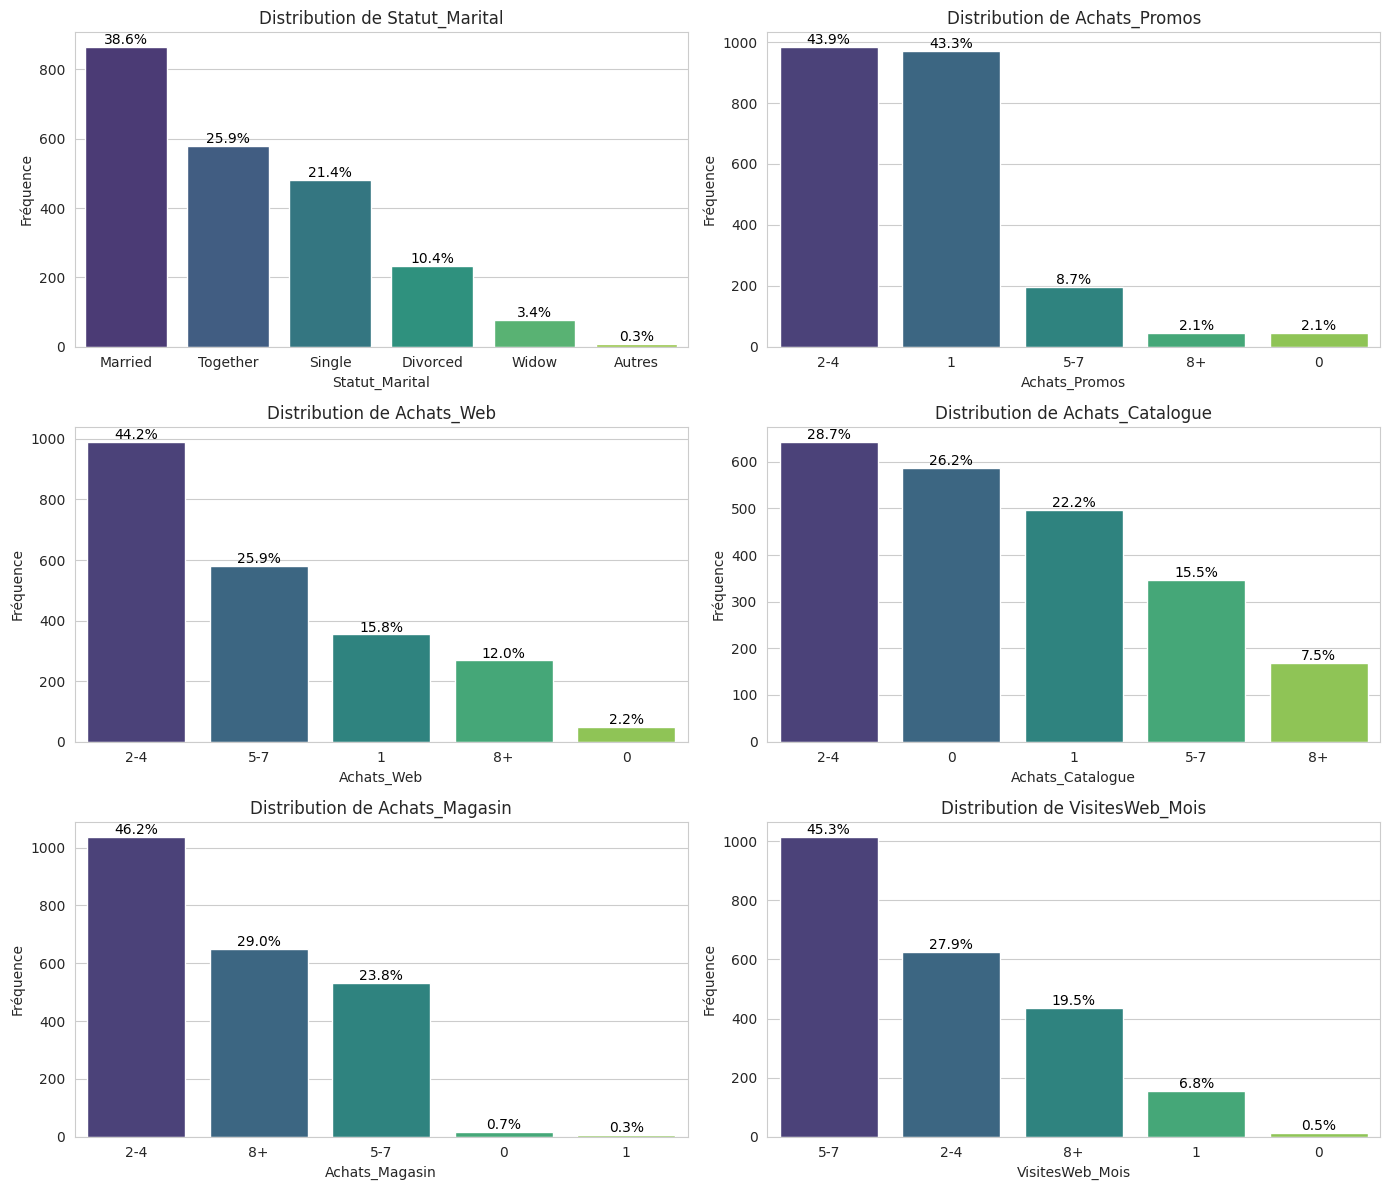

In [22]:
# Regroupement pour Statut Marital
df['Statut_Marital'] = df['Statut_Marital'].replace(['Alone', 'Absurd', 'YOLO'], 'Autres')

# Fonction de regroupement pour les achats et les visites web
def regroup_achats_visites(x):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x in [2, 3, 4]:
        return '2-4'
    elif x in [5, 6, 7]:
        return '5-7'
    else:
        return '8+'

# Application du regroupement aux colonnes d'achats et de visites web
for col in ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']:
    df[col] = df[col].apply(regroup_achats_visites)

# Visualisation des distributions après regroupement
import seaborn as sns
import matplotlib.pyplot as plt

# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Liste des colonnes à visualiser
    colonnes = ['Statut_Marital', 'Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']

    # Parcours des colonnes pour créer des histogrammes
    for ax, col in zip(axes, colonnes):
        total = df[col].notnull().sum()  # Total pour le calcul des pourcentages
        order = df[col].value_counts().index  # Ordre basé sur la fréquence
        countplot = sns.countplot(x=col, data=df, ax=ax, palette='viridis', order=order)
        ax.set_title(f'Distribution de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()


**Discrétisation de la Récence des Achats**

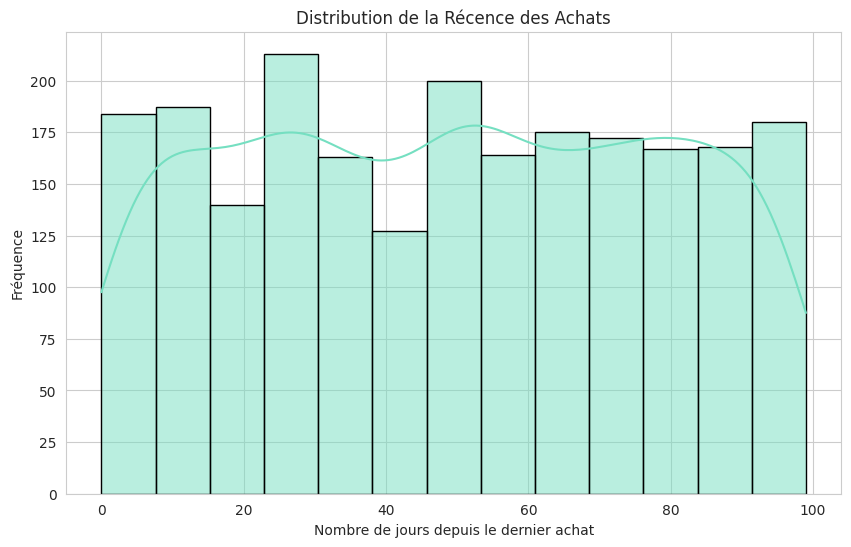

,count,mean,std,min,25%,50%,75%,max
Recence_Achat,2240.0,49.11,28.96,0.0,24.0,49.0,74.0,99.0


In [23]:
# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création de l'histogramme pour 'Recence_Achat'
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(df['Recence_Achat'], kde=True, color='#75DFC1', edgecolor='black')
    ax.set_title('Distribution de la Récence des Achats')
    ax.set_xlabel('Nombre de jours depuis le dernier achat')
    ax.set_ylabel('Fréquence')
    plt.show()


# Calcul des statistiques descriptives pour 'Revenu'
stats_desc_Recence_Achat = df["Recence_Achat"].describe().round(2)

# Convertir en DataFrame pour pouvoir transposer
stats_desc_Recence_Achat_df = pd.DataFrame(stats_desc_Recence_Achat)

# Transposition du tableau pour une meilleure présentation
stats_desc_Recence_Achat_transposed = stats_desc_Recence_Achat_df.T

# Affichage du tableau transposé
display(stats_desc_Recence_Achat_transposed)

**Discrétisation de la Récence des Achats**

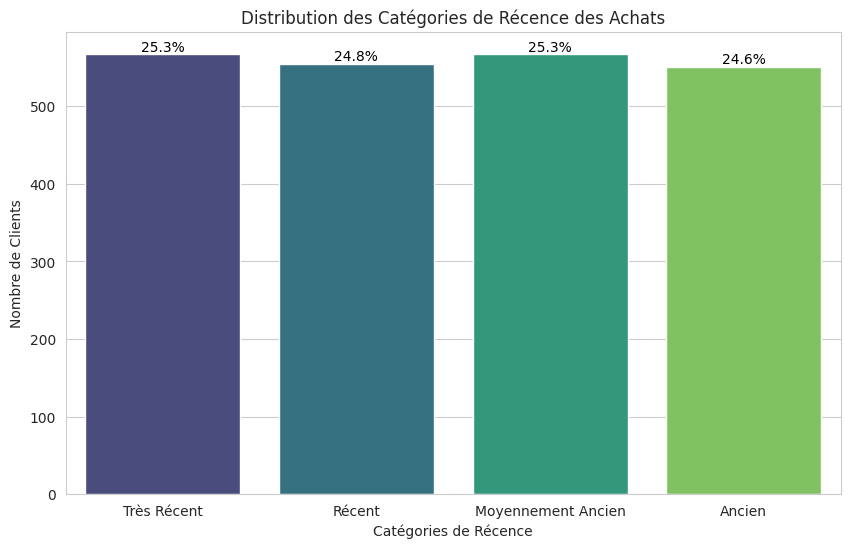

In [24]:
def discretize_recency(value, quartiles):
    if value <= quartiles[0.25]:
        return "Très Récent"
    elif value <= quartiles[0.50]:
        return "Récent"
    elif value <= quartiles[0.75]:
        return "Moyennement Ancien"
    else:
        return "Ancien"

# Calcul des quartiles pour 'Recence_Achat'
quartiles_recency = df['Recence_Achat'].quantile([0.25, 0.50, 0.75])

# Application de la discrétisation
df['Categorie_Recence_Achat'] = df['Recence_Achat'].apply(lambda x: discretize_recency(x, quartiles_recency))

# Utilisation d'un contexte de style Seaborn temporaire pour cette cellule uniquement
with sns.axes_style("whitegrid"):
    # Création de l'histogramme pour 'Categorie_Recence_Achat'
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='Categorie_Recence_Achat', data=df, palette='viridis', order=['Très Récent', 'Récent', 'Moyennement Ancien', 'Ancien'])
    ax.set_title('Distribution des Catégories de Récence des Achats')
    ax.set_xlabel('Catégories de Récence')
    ax.set_ylabel('Nombre de Clients')

    # Calcul du total pour les pourcentages
    total = len(df['Categorie_Recence_Achat'])

    # Ajout des pourcentages sur les barres
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

    plt.show()

**Nettoyage de la Base de Données**

In [25]:
col_drop = ["Identifiant","Revenu", "Age", "Annee_Naissance", "Date_Inscription", 'Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes', 'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or', 'Cout_Contact', 'Revenu_Z', 'Recence_Achat']
df_clean = df.drop(col_drop, axis=1)

**Analyse Bivariée des Données**

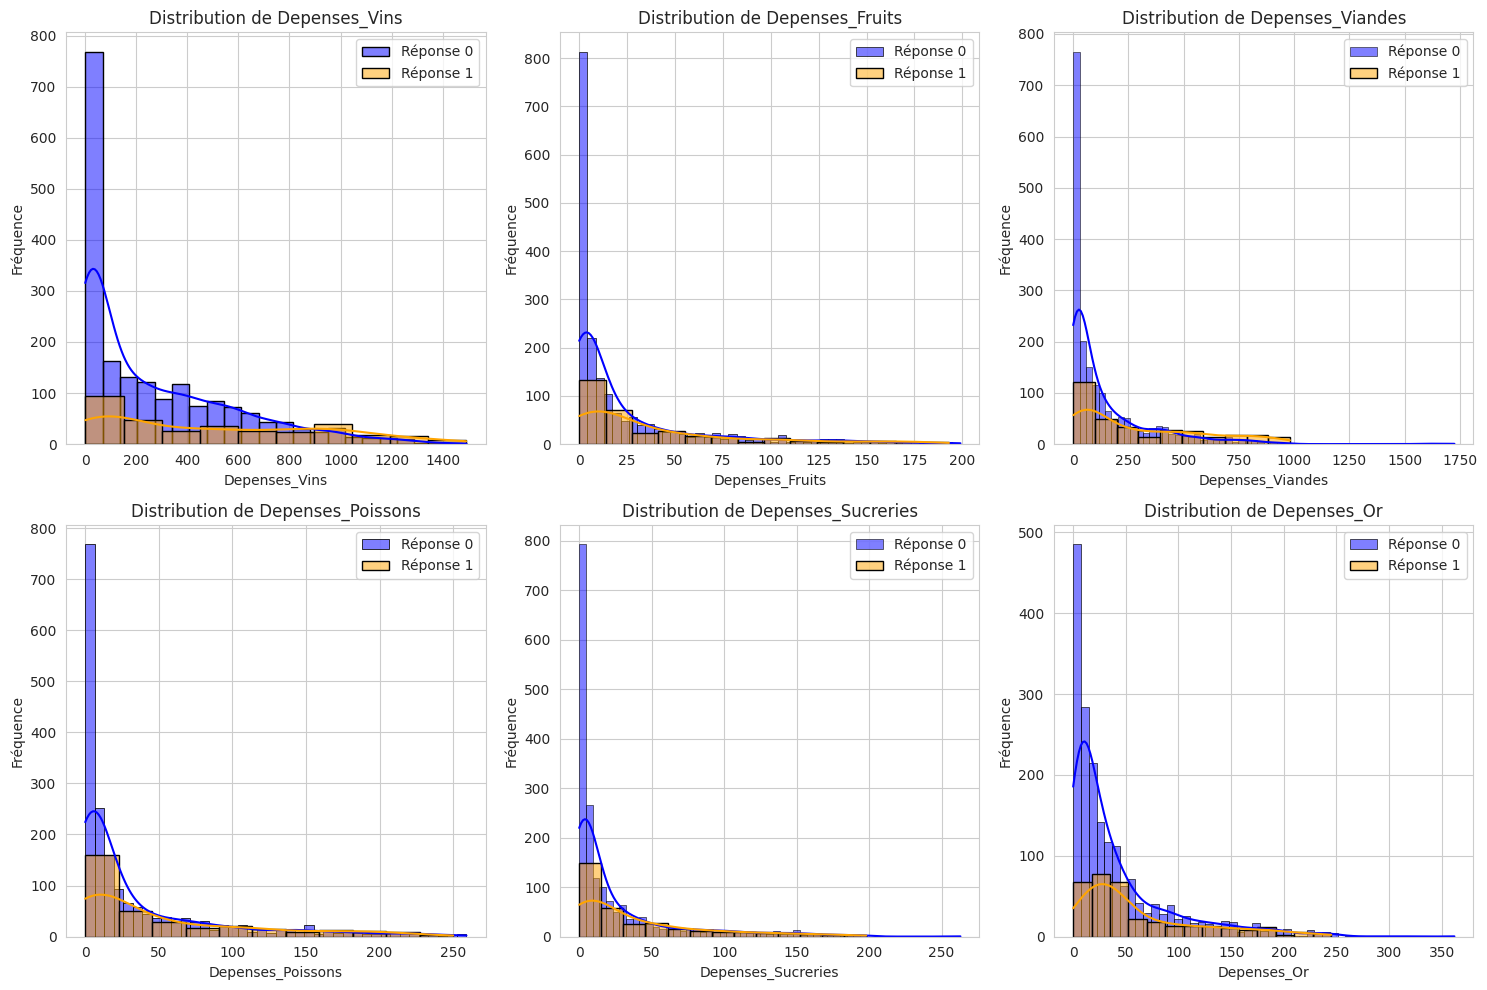

In [27]:
with sns.axes_style("whitegrid"):
    # Définition des variables à visualiser
    depenses_variables = ['Depenses_Vins', 'Depenses_Fruits', 'Depenses_Viandes',
                          'Depenses_Poissons', 'Depenses_Sucreries', 'Depenses_Or']

    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Aplatir le tableau des axes pour un accès facile
    axes = axes.flatten()

    # Parcours des variables pour créer des histogrammes et afficher la statistique descriptive
    for i, var in enumerate(depenses_variables):
        ax = axes[i]

        # Tracer les histogrammes pour la modalité 0 (Réponse == 0) en bleu
        sns.histplot(df[df['Reponse'] == 0][var], kde=True, ax=ax, color='blue', edgecolor='black', label='Réponse 0')

        # Tracer les histogrammes pour la modalité 1 (Réponse == 1) en orange
        sns.histplot(df[df['Reponse'] == 1][var], kde=True, ax=ax, color='orange', edgecolor='black', label='Réponse 1')

        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')
        ax.legend()

    plt.tight_layout()
    plt.show()


**Interprétation dépendes par type de reponse**


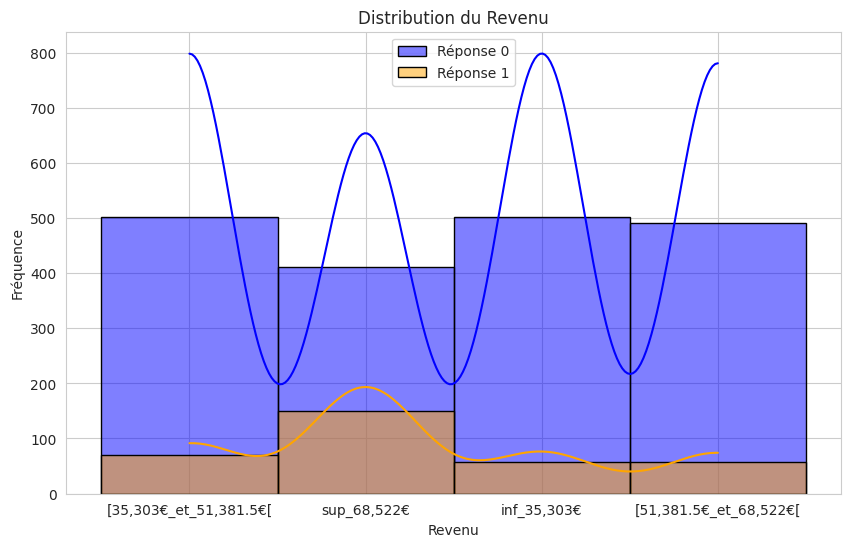

In [29]:
with sns.axes_style("whitegrid"):
    # Création d'un histogramme pour la variable 'Revenu'
    plt.figure(figsize=(10, 6))

    # Tracer l'histogramme pour la modalité 0 (Réponse == 0) en bleu
    sns.histplot(df_clean[df_clean['Reponse'] == 0]['Categorie_Revenu'], kde=True, color='blue', edgecolor='black', label='Réponse 0')

    # Tracer l'histogramme pour la modalité 1 (Réponse == 1) en orange
    sns.histplot(df_clean[df_clean['Reponse'] == 1]['Categorie_Revenu'], kde=True, color='orange', edgecolor='black', label='Réponse 1')

    plt.title('Distribution du Revenu')
    plt.xlabel('Revenu')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()





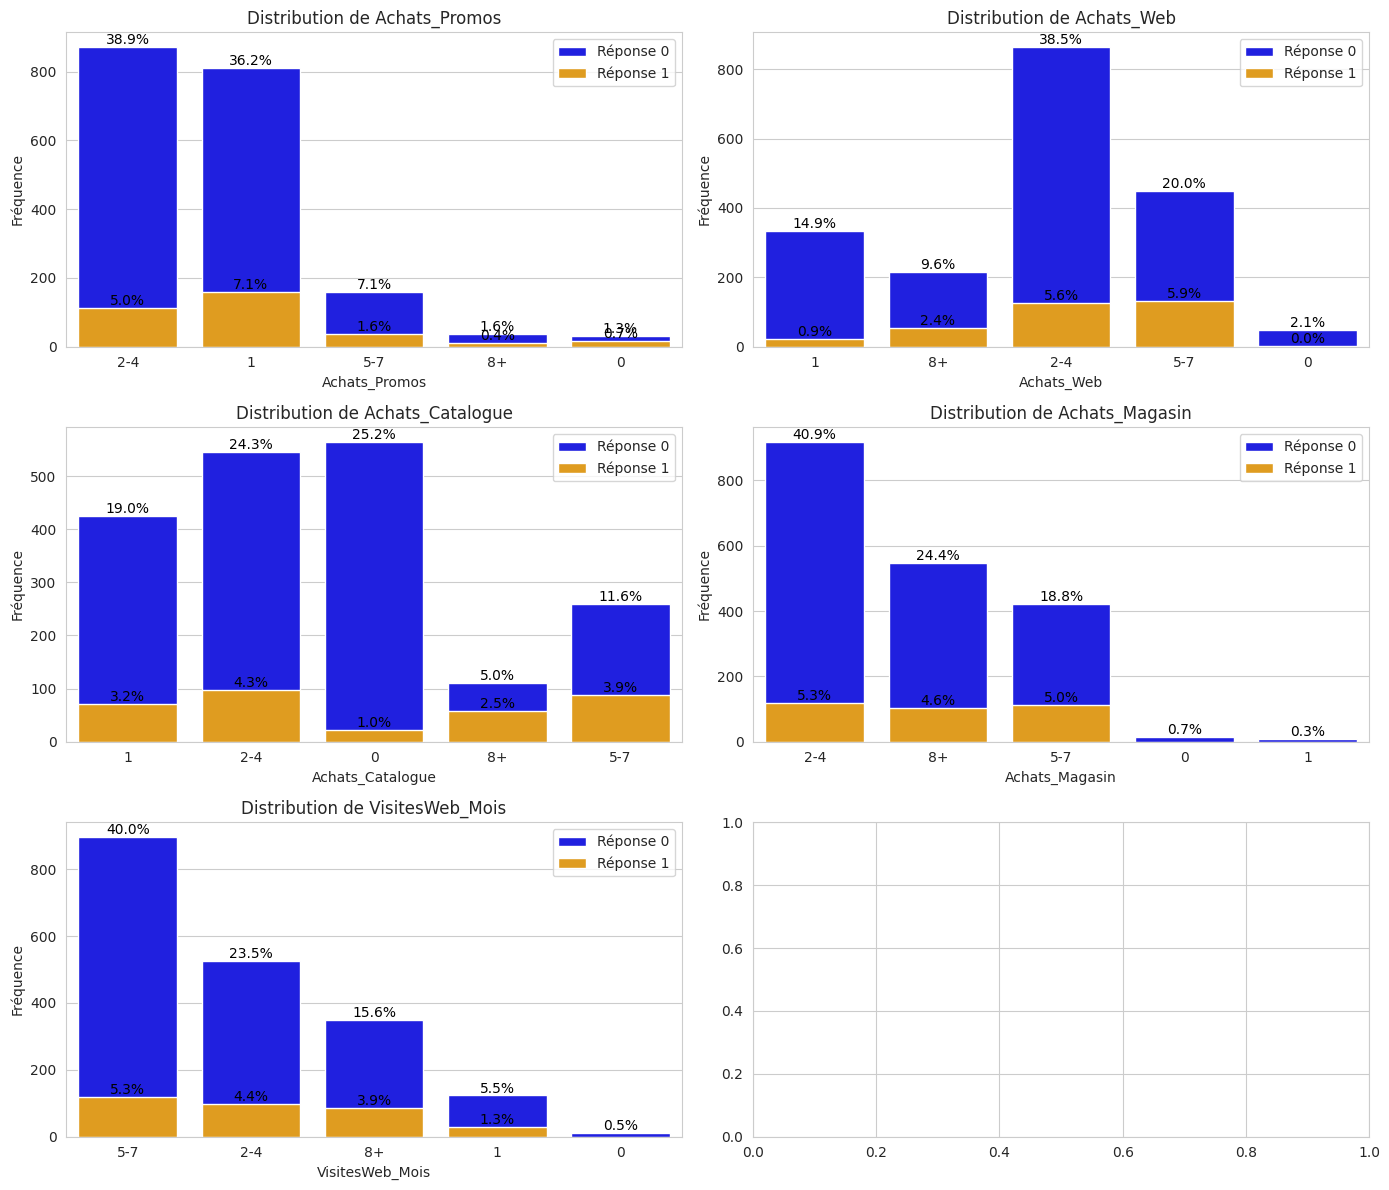

In [30]:
with sns.axes_style("whitegrid"):
    # Les noms de variables en français
    variables = ['Achats_Promos', 'Achats_Web', 'Achats_Catalogue', 'Achats_Magasin', 'VisitesWeb_Mois']

    # Création d'une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()  # Aplatir le tableau des axes pour un accès facile

    # Parcours des variables pour créer des histogrammes
    for ax, var in zip(axes, variables):
        total = df[var].notnull().sum()  # Total pour le calcul des pourcentages

        # Tracer les countplots pour la modalité 0 (Réponse == 0) en bleu
        sns.countplot(x=var, data=df_clean[df_clean['Reponse'] == 0], ax=ax, color='blue', label='Réponse 0')

        # Tracer les countplots pour la modalité 1 (Réponse == 1) en orange
        sns.countplot(x=var, data=df_clean[df_clean['Reponse'] == 1], ax=ax, color='orange', label='Réponse 1')

        ax.set_title(f'Distribution de {var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Fréquence')

        # Ajout des pourcentages sur les barres
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

    plt.tight_layout()
    plt.show()

**Modélisation et Exploration des Données**

In [31]:
df_clean.head()

,Niveau_Education,Statut_Marital,Nb_Enfants,Nb_Adolescents,Achats_Promos,Achats_Web,Achats_Catalogue,Achats_Magasin,VisitesWeb_Mois,Campagne3_Acceptee,...,Categorie_Revenu,Categorie_Depenses_Vins,Categorie_Depenses_Fruits,Categorie_Depenses_Viandes,Categorie_Depenses_Poissons,Categorie_Depenses_Sucreries,Categorie_Depenses_Or,Anciennete,Categorie_Age,Categorie_Recence_Achat
0,Graduation,Single,0,0,2-4,8+,8+,2-4,5-7,0,...,"[51,381.5€_et_68,522€[",sup_504.25€,sup_33.0€,sup_232.0€,sup_50.0€,sup_33.0€,sup_56.0€,7,sup_60_ans,Moyennement Ancien
1,Graduation,Single,1,1,2-4,1,1,2-4,5-7,0,...,"[35,303€_et_51,381.5€[",inf_23.75€,inf_1.0€,inf_16.0€,inf_3.0€,inf_1.0€,inf_9.0€,5,sup_60_ans,Récent
2,Graduation,Together,0,0,1,8+,2-4,8+,2-4,0,...,"sup_68,522€",[173.5€_et_504.25€[,sup_33.0€,[67.0€_et_232.0€[,sup_50.0€,[8.0€_et_33.0€[,[24.0€_et_56.0€[,6,[_49_et_60_ans],Récent
3,Graduation,Together,1,0,2-4,2-4,0,2-4,5-7,0,...,"inf_35,303€",inf_23.75€,[1.0€_et_8.0€[,[16.0€_et_67.0€[,[3.0€_et_12.0€[,[1.0€_et_8.0€[,inf_9.0€,5,inf_42_ans,Récent
4,PhD,Married,1,0,5-7,5-7,2-4,5-7,5-7,0,...,"[51,381.5€_et_68,522€[",[23.75€_et_173.5€[,sup_33.0€,[67.0€_et_232.0€[,[12.0€_et_50.0€[,[8.0€_et_33.0€[,[9.0€_et_24.0€[,5,inf_42_ans,Ancien


In [33]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Selecting only object type columns (qualitative variables)
qualitative_columns = df_clean.select_dtypes(include=['object']).columns

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Utiliser sparse_output au lieu de sparse
encoded_data = encoder.fit_transform(df_clean[qualitative_columns])

# Creating a DataFrame with the encoded data
encoded_column_names = encoder.get_feature_names_out(qualitative_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)

# Concatenating the encoded data with the original data, dropping original qualitative columns
transformed_data = pd.concat([df_clean.drop(qualitative_columns, axis=1), encoded_df], axis=1)

# Displaying the transformed data
transformed_data.head()


,Nb_Enfants,Nb_Adolescents,Campagne3_Acceptee,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Plainte,Reponse,Anciennete,...,Categorie_Depenses_Or_inf_9.0€,Categorie_Depenses_Or_sup_56.0€,Categorie_Age_[42_et_49_ans],Categorie_Age_[_49_et_60_ans],Categorie_Age_inf_42_ans,Categorie_Age_sup_60_ans,Categorie_Recence_Achat_Ancien,Categorie_Recence_Achat_Moyennement Ancien,Categorie_Recence_Achat_Récent,Categorie_Recence_Achat_Très Récent
0,0,0,0,0,0,0,0,0,1,7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1,1,0,0,0,0,0,0,0,5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,0,0,0,0,0,0,0,5,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,0,0,0,0,0,5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


**Analyse de Corrélation avec la Variable Cible Reponse du Client**

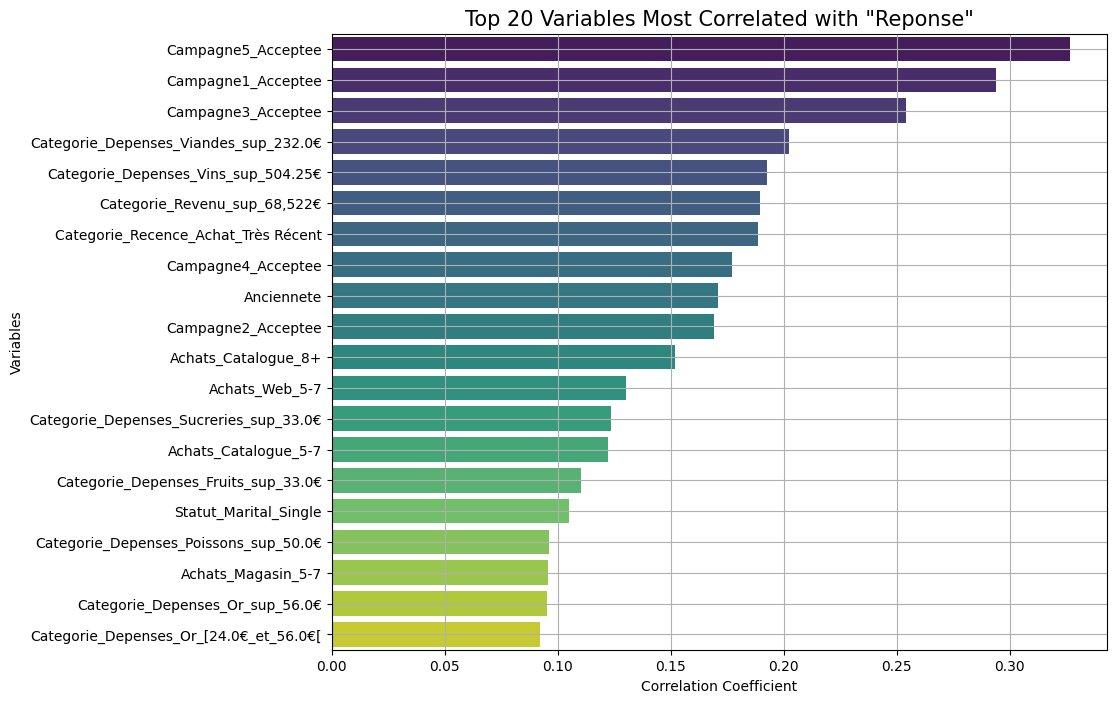

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the correlation with the target variable 'Reponse'
correlation = transformed_data.corr()['Reponse'].sort_values(ascending=False)

# Selecting the top 20 most correlated variables (excluding 'Reponse' itself)
top_correlated_columns = correlation[1:21]  # Skipping the first one as it will be 'Reponse' itself

# Creating a bar plot for visualization
plt.figure(figsize=(10, 8))
sns.barplot(x=top_correlated_columns.values, y=top_correlated_columns.index, palette="viridis")

plt.title('Top 20 Variables Most Correlated with "Reponse"', fontsize=15)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(True)
plt.show()

**Division du Jeu de Données en Ensembles d'Entraînement (70%) et de Test (30%)**

In [37]:
from sklearn.model_selection import train_test_split

# Supposons que 'transformed_data' soit votre jeu de données et 'Reponse' la variable cible
X = transformed_data.drop('Reponse', axis=1)  # Caractéristiques
y = transformed_data['Reponse']               # Cible

# Division des données en ensembles d'entraînement et de test, avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Pour vérifier, vous pouvez regarder les proportions de 'Reponse' dans les ensembles d'entraînement et de test
train_proportion = y_train.value_counts(normalize=True)
test_proportion = y_test.value_counts(normalize=True)
print(train_proportion)
print(test_proportion)

Reponse
0    0.850765
1    0.149235
Name: proportion, dtype: float64
Reponse
0    0.85119
1    0.14881
Name: proportion, dtype: float64


**Classification basé sur Régression Logistique pour l'Analyse des Campagnes Marketing**

0.8883928571428571
[[556  16]
 [ 59  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       572
           1       0.72      0.41      0.52       100

    accuracy                           0.89       672
   macro avg       0.81      0.69      0.73       672
weighted avg       0.88      0.89      0.88       672



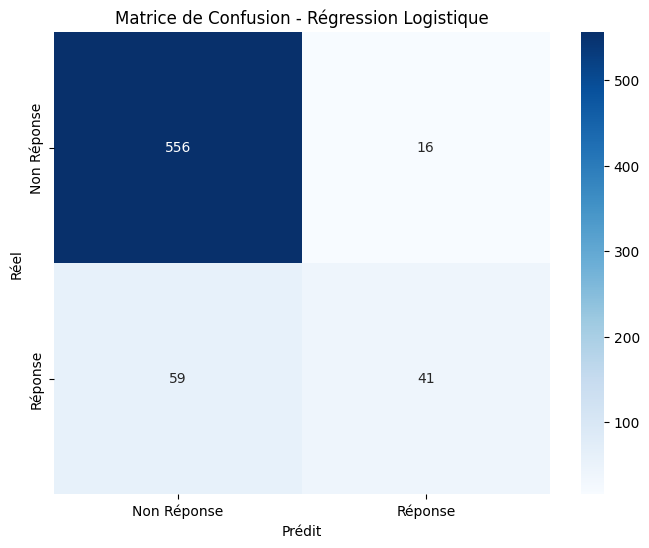

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle avec l'ensemble d'entraînement
logistic_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV

# Paramètres à tester pour l'optimisation
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Valeurs de régularisation
    'penalty': ['l1', 'l2'],  # Types de pénalité (l1 = lasso, l2 = ridge)
    'solver': ['liblinear', 'saga']  # Solveurs compatibles avec les pénalités l1 et l2
}

# Création du modèle de régression logistique pour la recherche sur grille
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Recherche sur grille avec validation croisée
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement avec l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Meilleur modèle et paramètres
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

best_model, best_params

(LogisticRegression(C=1, max_iter=1000, random_state=42, solver='saga'),
 {'C': 1, 'penalty': 'l2', 'solver': 'saga'})

In [40]:
# Création du modèle de régression logistique avec les meilleurs paramètres
final_model = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=1000, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
final_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_final = final_model.predict(X_test)

# Évaluation du modèle final
final_accuracy = accuracy_score(y_test, y_pred_final)
final_conf_matrix = confusion_matrix(y_test, y_pred_final)
final_class_report = classification_report(y_test, y_pred_final)

print(final_accuracy)
print(final_conf_matrix)
print(final_class_report)

0.8898809523809523
[[557  15]
 [ 59  41]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       572
           1       0.73      0.41      0.53       100

    accuracy                           0.89       672
   macro avg       0.82      0.69      0.73       672
weighted avg       0.88      0.89      0.88       672



**Matrice de confusion sous forme de heatmap**

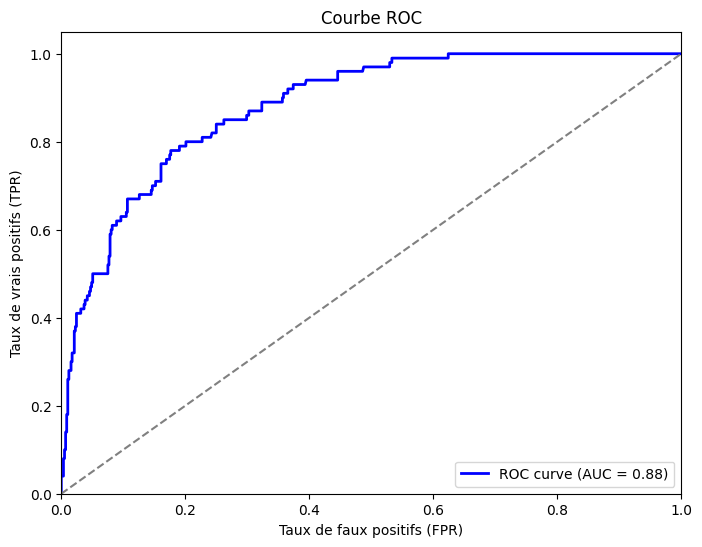

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilités prédites pour la classe positive (1)
y_prob = final_model.predict_proba(X_test)[:, 1]

# Calcul des valeurs de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Courbe aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


**Classification basé sur l'Arbre de Décision**

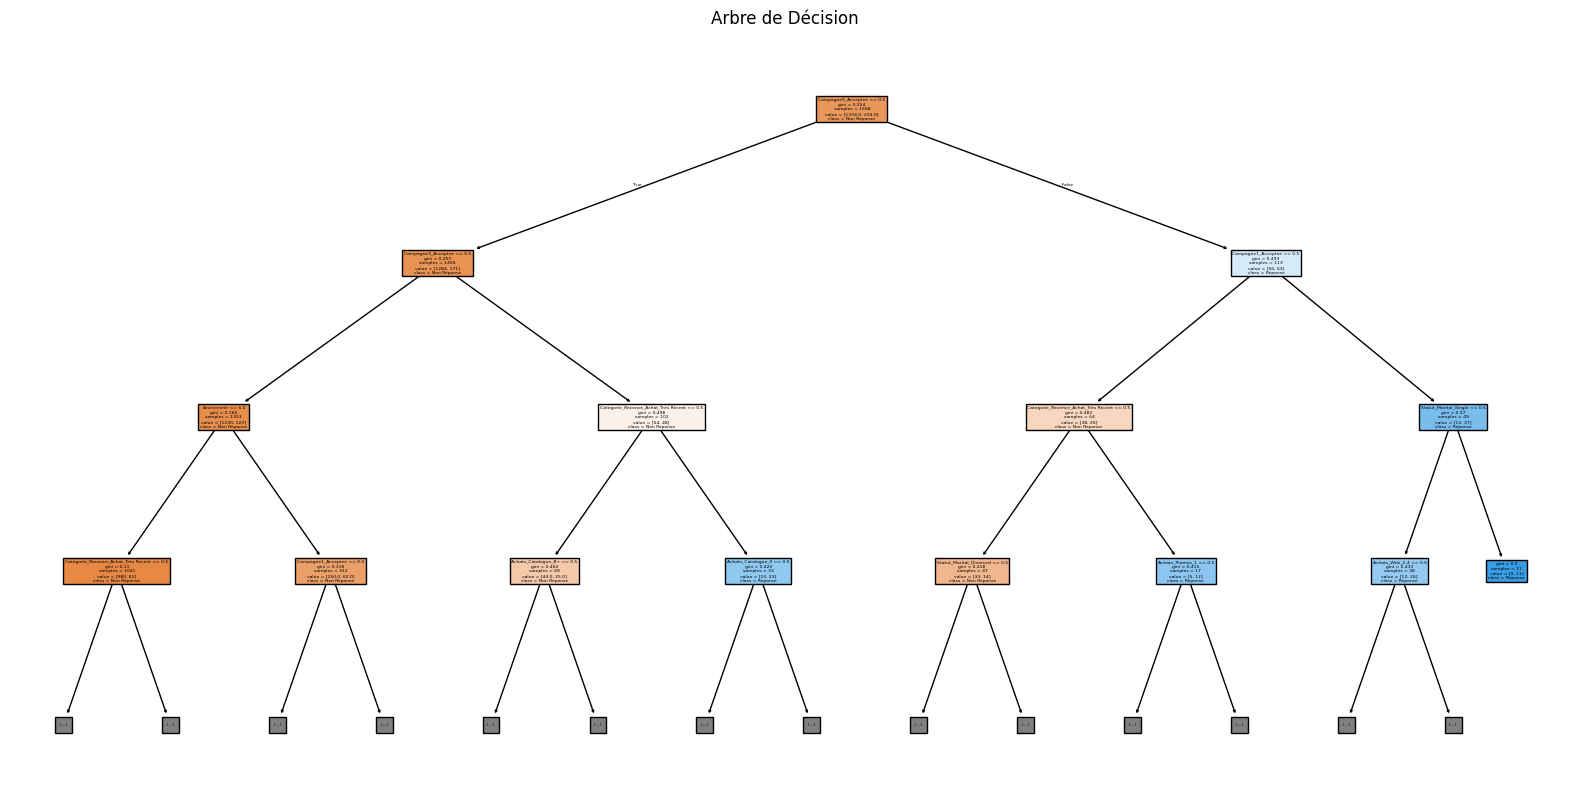

0.8601190476190477
[[530  42]
 [ 52  48]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       572
           1       0.53      0.48      0.51       100

    accuracy                           0.86       672
   macro avg       0.72      0.70      0.71       672
weighted avg       0.85      0.86      0.86       672



In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Création du modèle d'arbre de décision
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
decision_tree_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_dt = decision_tree_model.predict(X_test)

# Évaluation du modèle
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
dt_class_report = classification_report(y_test, y_pred_dt)

# Affichage de l'arbre de décision
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X.columns, class_names=['Non Réponse', 'Réponse'], max_depth=3)
plt.title("Arbre de Décision")
plt.show()

print(dt_accuracy)
print(dt_conf_matrix)
print(dt_class_report)

**Classification basé sur le Modèle Gradient Boosting**

<Figure size 800x600 with 0 Axes>

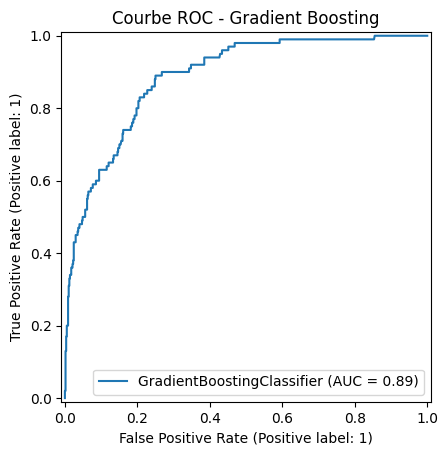

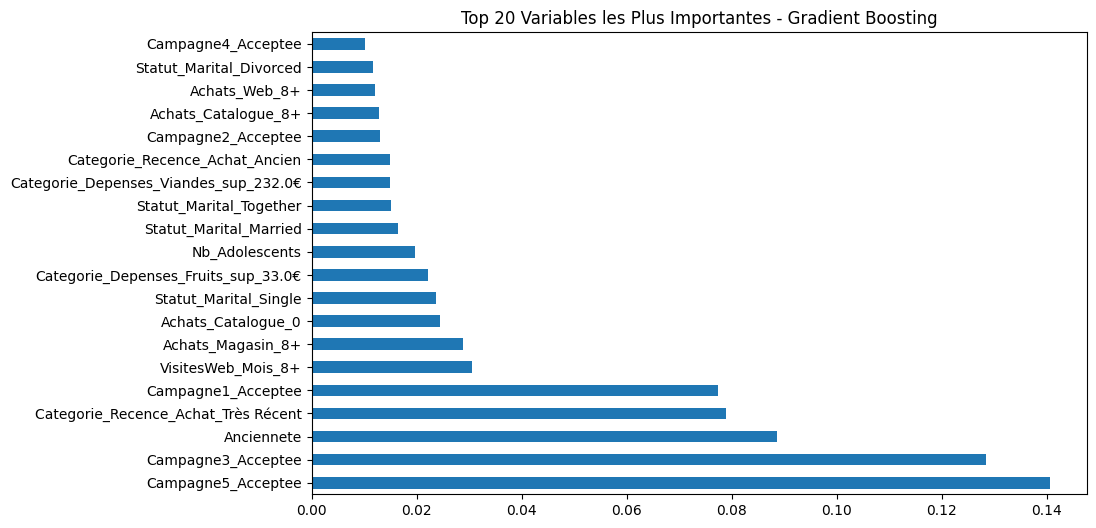

0.8869047619047619


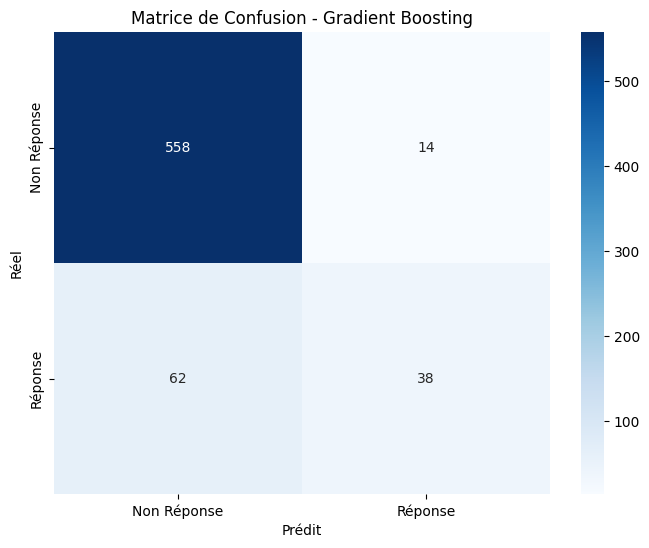

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       572
           1       0.73      0.38      0.50       100

    accuracy                           0.89       672
   macro avg       0.82      0.68      0.72       672
weighted avg       0.87      0.89      0.87       672



In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Création du modèle Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Entraînement du modèle
gb_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_gb = gb_model.predict(X_test)

# Évaluation du modèle
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
gb_class_report = classification_report(y_test, y_pred_gb)

# Importance des variables
feature_importances = gb_model.feature_importances_

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(gb_model, X_test, y_test)
plt.title("Courbe ROC - Gradient Boosting")
plt.show()

# Affichage des 10 variables les plus importantes
important_features = pd.Series(feature_importances, index=X.columns).nlargest(20)
plt.figure(figsize=(10, 6))
important_features.plot(kind='barh')
plt.title("Top 20 Variables les Plus Importantes - Gradient Boosting")
plt.show()

print(gb_accuracy)
# Amélioration de la visualisation de la matrice de confusion pour le modèle Gradient Boosting

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Gradient Boosting')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

print(gb_class_report)

In [45]:
slect_col_corr = top_correlated_columns.index.tolist()

0.8779761904761905
[[558  14]
 [ 68  32]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       572
           1       0.70      0.32      0.44       100

    accuracy                           0.88       672
   macro avg       0.79      0.65      0.68       672
weighted avg       0.86      0.88      0.86       672



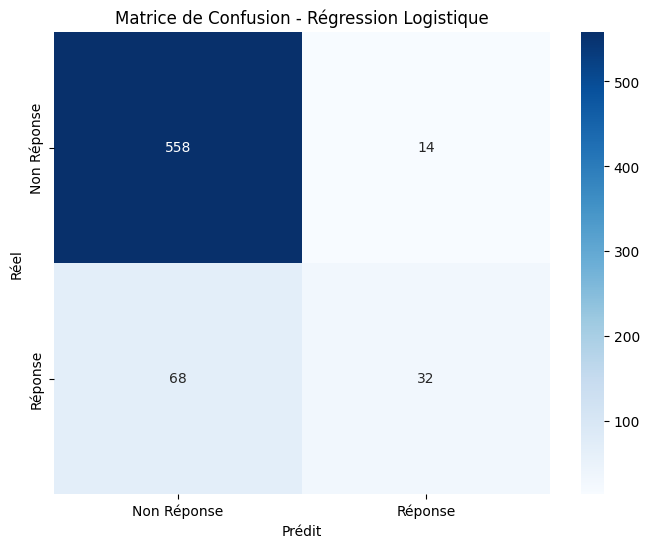

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Création du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Entraînement du modèle avec l'ensemble d'entraînement
logistic_model.fit(X_train[slect_col_corr], y_train)

# Prédiction sur l'ensemble de test
y_pred = logistic_model.predict(X_test[slect_col_corr])

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)
print(class_report)

# Création d'un heatmap pour la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

Caractéristiques sélectionnées :
Index(['Campagne3_Acceptee', 'Campagne5_Acceptee', 'Campagne1_Acceptee',
       'Campagne2_Acceptee', 'Anciennete', 'Niveau_Education_Basic',
       'Statut_Marital_Married', 'Statut_Marital_Together',
       'Achats_Catalogue_0', 'Categorie_Recence_Achat_Très Récent'],
      dtype='object')


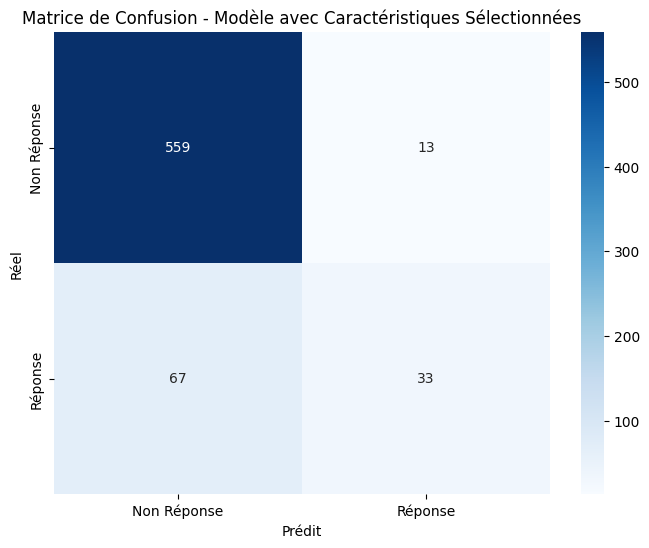

Précision du modèle :  0.8809523809523809
Rapport de classification :
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       572
           1       0.72      0.33      0.45       100

    accuracy                           0.88       672
   macro avg       0.81      0.65      0.69       672
weighted avg       0.87      0.88      0.86       672



In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Création du modèle de sélection de caractéristiques
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=10, step=1)

# Entraînement du sélecteur
selector = selector.fit(X_train, y_train)

# Sélection des caractéristiques
selected_features = X_train.columns[selector.support_]

# Affichage des caractéristiques sélectionnées
print("Caractéristiques sélectionnées :")
print(selected_features)

# Création d'un nouveau modèle avec les caractéristiques sélectionnées
model = LogisticRegression(max_iter=1000)
model.fit(X_train[selected_features], y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test[selected_features])

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Modèle avec Caractéristiques Sélectionnées')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

print("Précision du modèle : ", accuracy)
print("Rapport de classification :\n", class_report)

**Classification basé sur une Forêt Aléatoire**

Précision du modèle de forêt aléatoire : 0.8824404761904762
Matrice de confusion :
 [[567   5]
 [ 74  26]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       572
           1       0.84      0.26      0.40       100

    accuracy                           0.88       672
   macro avg       0.86      0.63      0.67       672
weighted avg       0.88      0.88      0.85       672



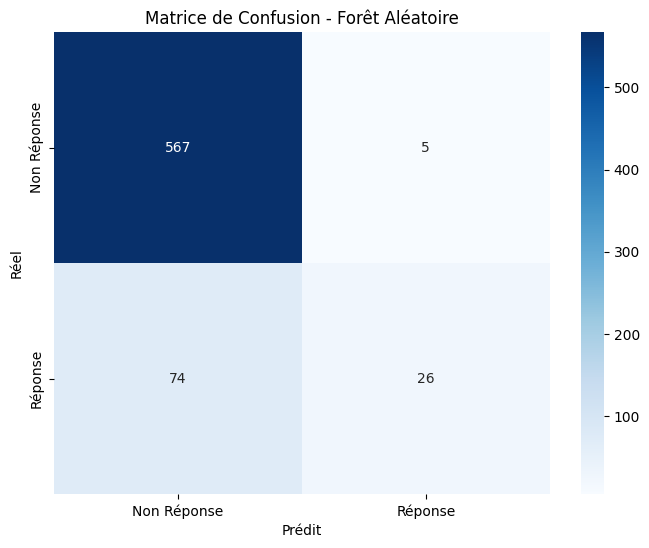

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Création du modèle de forêt aléatoire
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Entraînement du modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)

# Évaluation du modèle
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

# Affichage des résultats
print("Précision du modèle de forêt aléatoire :", rf_accuracy)
print("Matrice de confusion :\n", rf_conf_matrix)
print("Rapport de classification :\n", rf_class_report)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Réponse', 'Réponse'], yticklabels=['Non Réponse', 'Réponse'])
plt.title('Matrice de Confusion - Forêt Aléatoire')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()